In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df_train = pd.read_csv("train.csv")
df_train = df_train.loc[:, ["Sex", "Age", "Fare", "Pclass", "Survived"]]

df_train_x = df_train.loc[:, ["Sex", "Age", "Fare", "Pclass"]]
df_train_x.fillna(value=0.5, inplace=True)

print("training set: ")
print(f"Shape_x: {df_train_x.shape}")
print(df_train_x.head())

df_train_y = df_train.loc[:, ["Survived"]].dropna()
print(df_train_y.head())

training set: 
Shape_x: (891, 4)
      Sex   Age     Fare  Pclass
0    male  22.0   7.2500       3
1  female  38.0  71.2833       1
2  female  26.0   7.9250       3
3  female  35.0  53.1000       1
4    male  35.0   8.0500       3
   Survived
0         0
1         1
2         1
3         1
4         0


In [3]:
df_train_x["Sex"] = df_train_x["Sex"].astype('category').cat.codes
print(df_train_x.head())

   Sex   Age     Fare  Pclass
0    1  22.0   7.2500       3
1    0  38.0  71.2833       1
2    0  26.0   7.9250       3
3    0  35.0  53.1000       1
4    1  35.0   8.0500       3


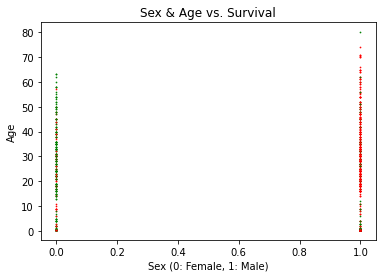

In [4]:
figure, plot = plt.subplots()

for i in range(df_train_x.to_numpy().shape[0]):
    plot.scatter(df_train_x.iloc[i, 0], df_train_x.iloc[i, 1], s=0.5, color="green" if (df_train_y.iloc[i, 0] >= 0.5) else "red")

plot.set_ylabel('Age')
plot.set_xlabel('Sex (0: Female, 1: Male)')
plot.set_title('Sex & Age vs. Survival')

plt.show()

In [5]:
df_train_x_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_train_x.to_numpy()))
print("Train: ")
print(df_train_x_norm.head())

Train: 
     0         1         2    3
0  1.0  0.271174  0.014151  1.0
1  0.0  0.472229  0.139136  0.0
2  0.0  0.321438  0.015469  1.0
3  0.0  0.434531  0.103644  0.0
4  1.0  0.434531  0.015713  1.0


In [6]:
df_test = pd.read_csv("test.csv")
df_test_x = df_test.loc[:, ["Sex", "Age", "Fare", "Pclass"]]
df_test_x.fillna(value=0.5, inplace=True)

df_test_x["Sex"] = df_test_x["Sex"].astype('category').cat.codes

df_test_x_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_test_x.to_numpy()))
print("Test: ")
print(df_test_x_norm.head())

Test: 
     0         1         2    3
0  1.0  0.452723  0.015282  1.0
1  0.0  0.617566  0.013663  1.0
2  1.0  0.815377  0.018909  0.5
3  1.0  0.353818  0.016908  1.0
4  0.0  0.287881  0.023984  1.0


In [7]:
poly = PolynomialFeatures(2)
df_train_x_norm_poly = poly.fit_transform(df_train_x_norm)

In [8]:
model = LogisticRegression().fit(df_train_x_norm_poly, df_train_y.values.ravel())
model.score(df_train_x_norm_poly, df_train_y)

0.8035914702581369

In [9]:
prediction = model.predict(df_train_x_norm_poly)
print("coef_: ", model.coef_, "intercept_:", model.intercept_)

coef_:  [[ 1.39571371e-05 -1.65324619e+00 -9.63262211e-02  1.19843256e-01
  -1.68555059e+00 -1.65324619e+00 -5.60563034e-01  2.63531450e-01
   1.27920028e+00 -5.32314165e-01  3.05615518e-01 -8.93502403e-01
   4.23690724e-01 -3.57228306e-01 -9.47596229e-01]] intercept_: [3.0297609]


In [10]:
df_test_x_norm_poly = poly.fit_transform(df_test_x_norm)
test_prediction = model.predict(df_test_x_norm_poly)

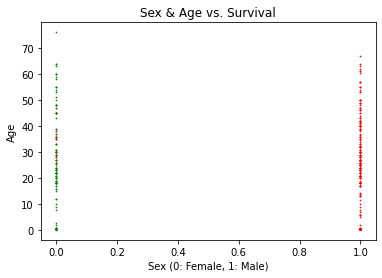

In [11]:
figure2, plot2 = plt.subplots()

for i in range(df_test_x.shape[0]):
    plot2.scatter(df_test_x.iloc[i, 0], df_test_x.iloc[i, 1], s=0.5, color="green" if test_prediction[i] else "red")

plot2.set_ylabel('Age')
plot2.set_xlabel('Sex (0: Female, 1: Male)')
plot2.set_title('Sex & Age vs. Survival')

plt.show()

In [12]:
submission_df = pd.DataFrame(test_prediction)
submission_df.index += 892
submission_df.to_csv("submission/submission.csv", index_label="PassengerId", header=["Survived"])